In [1]:
from trajectory_grid import trajectory_grid
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

In [2]:
path = "/storage/silver/metstudent/msc/users_2021/yc810080/data/traj_data2/"
filename= "utraj-rf_cab2009101012"

In [3]:
#initialise trajectory grid instance
# shape must be the shape of the input data: nt, nz, ny, nx
# where nt is the number of timesteps to read 
# and (nz,ny,nx) is the shape of the release grid
# - if nt is less than the total number of timesteps outputted 
#    the array will be truncated - this may be desirable
# - however (nz,ny,nx) must be set correctly or the data will 
#    be read in an incorrect order

# A trajectory grid is essentially a dictionary of numpy arrays,
# with numpy-style array indexing overloaded to the dictionary
# (so you can slice the whole dataset at once)
traj = trajectory_grid(filename=path+filename,shape=(20,34,41,61))

In [4]:
# print basic summary info
print(traj)

trajectory_grid(base=2009-10-10_12, p: 975.0-150.0, lat: -5.0--25.0, lon: 10.0-40.0, (20, 34, 41, 61))


In [5]:
# list arrays and array shapes
for key in traj.data.keys():
    print(key,traj.data[key].shape)

lat (20, 34, 41, 61)
lon (20, 34, 41, 61)
p (20, 34, 41, 61)
T (20, 34, 41, 61)
PV (20, 34, 41, 61)
q (20, 34, 41, 61)
z (20, 34, 41, 61)
blh (20, 34, 41, 61)


In [6]:
# header info from utraj file etc. 
print(traj.data_basetime) # run date
print(traj.traj_basetime) # trajectory start date
print(traj.filename)
print(traj.forward) # forward trajectories? true or false
print(traj.interval_timesteps) #timestep 
print(traj.time_units) # units of timestep
print(traj.n_attr) # number of atmospheric variables (excl. p,lon,lat)
print(traj.ntraj) # number of trajectories


2021-05-12 00:00:00
2009-10-10 12:00:00
/storage/silver/metstudent/msc/users_2021/yc810080/data/traj_data2/utraj-rf_cab2009101012
F
6
HOURS
5
85034


In [7]:
# subset trajectory grid. This works like numpy array subsetting
traj2 = traj[:8,8,:10,:10]
print(traj2)

trajectory_grid(base=2009-10-10_12, p: 775.0, lat: -5.0--9.5, lon: 10.0-14.5, (8, 10, 10))


In [8]:
# modify trajectory data to calculate dewpoint temperature
# example of how new fields can be derived and added to traj object
# https://www.eoas.ubc.ca/books/Practical_Meteorology/prmet102/Ch04-watervapor-v102b.pdf

traj.data["q"] = np.maximum(traj.data["q"],1e-9) # avoids log(0)
traj.data["e"]= traj.data["p"]*100*traj.data["q"]/0.622 #vapour pressure
traj.data["Td"]=(1/273.15-1.844*0.0001*np.log(traj.data["e"]/611.3))**-1

In [9]:
# get coordinates of subsetted grid
print("init. longitude: ",traj2.lon)
print("init. latitude:",traj2.lat)
print("init. pressure:",traj2.p)
print("times:",traj2.time)


init. longitude:  [10.  10.5 11.  11.5 12.  12.5 13.  13.5 14.  14.5]
init. latitude: [-5.  -5.5 -6.  -6.5 -7.  -7.5 -8.  -8.5 -9.  -9.5]
init. pressure: 775.0
times: [datetime.datetime(2009, 10, 10, 12, 0)
 datetime.datetime(2009, 10, 10, 6, 0)
 datetime.datetime(2009, 10, 10, 0, 0)
 datetime.datetime(2009, 10, 9, 18, 0)
 datetime.datetime(2009, 10, 9, 12, 0)
 datetime.datetime(2009, 10, 9, 6, 0) datetime.datetime(2009, 10, 9, 0, 0)
 datetime.datetime(2009, 10, 8, 18, 0)]


In [10]:
# helper function for pcolormesh
def pcoloraxis(x):
   out = np.zeros(len(x)+1)
   dx = (x[1:]-x[:-1]).mean()
   out[:-1] = x-0.5*dx
   out[-1] = x[-1]+0.5*dx
   return out



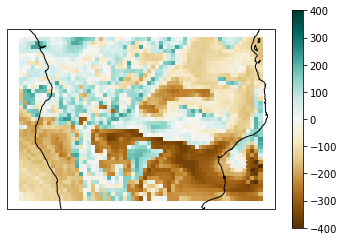

In [11]:
# plot delta pressure of 775 hPa trajectories

ax=plt.subplot(111,projection=ccrs.PlateCarree())
ax.coastlines()
a=ax.pcolormesh(pcoloraxis(traj.lon),pcoloraxis(traj.lat),\
              traj[-1,8].data["p"]-traj[0,8].data["p"],\
              vmin=-400,vmax=400,cmap="BrBG")
plt.colorbar(a)

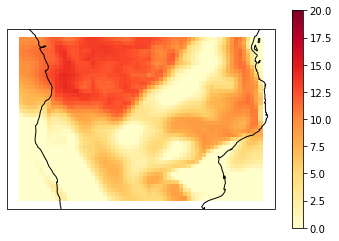

In [12]:
# plot dewpoint at release time

ax=plt.subplot(111,projection=ccrs.PlateCarree())
ax.coastlines()
a=ax.pcolormesh(pcoloraxis(traj.lon),pcoloraxis(traj.lat),\
              traj[0,8].data["Td"]-273.15,\
              vmin=0,vmax=20,cmap="YlOrRd")
plt.colorbar(a)